# Homework 5

In [1]:
# mute logging in jupyter notebook
import Logging
Logging.disable_logging(Logging.Warn)

# load dependency
using DataFrames, Statistics, Plots, GLM
import CSV

## a. Import the index data of `^HSI`

The data is more than 9k lines.

In [2]:
df = CSV.read("^HSI.csv",DataFrame)

,Date,Open,High,Low,Close,Adj Close,Volume0
,Date,Float64,Float64,Float64,Float64,Float64,Float64
1,1986-12-31,2568.3,2568.3,2568.3,2568.3,2568.3,0.0
2,1987-01-01,NaN,NaN,NaN,NaN,NaN,NaN
3,1987-01-02,2540.1,2540.1,2540.1,2540.1,2540.1,0.0
4,1987-01-05,2552.4,2552.4,2552.4,2552.4,2552.4,0.0
5,1987-01-06,2583.9,2583.9,2583.9,2583.9,2583.9,0.0
6,1987-01-07,2607.1,2607.1,2607.1,2607.1,2607.1,0.0
7,1987-01-08,2603.3,2603.3,2603.3,2603.3,2603.3,0.0
8,1987-01-09,2561.7,2561.7,2561.7,2561.7,2561.7,0.0
9,1987-01-12,2614.9,2614.9,2614.9,2614.9,2614.9,0.0


## b. Clean the data by removing the unwanted lines labeled by “null”.

Before importing data, I actually preprocessed data by replacing `null` with `NaN`.

Then next step, just remove all `NaN` in the dataframe.

In [3]:
df = df[.!isnan.(df.Close),:]

,Date,Open,High,Low,Close,Adj Close,Volume0
,Date,Float64,Float64,Float64,Float64,Float64,Float64
1,1986-12-31,2568.3,2568.3,2568.3,2568.3,2568.3,0.0
2,1987-01-02,2540.1,2540.1,2540.1,2540.1,2540.1,0.0
3,1987-01-05,2552.4,2552.4,2552.4,2552.4,2552.4,0.0
4,1987-01-06,2583.9,2583.9,2583.9,2583.9,2583.9,0.0
5,1987-01-07,2607.1,2607.1,2607.1,2607.1,2607.1,0.0
6,1987-01-08,2603.3,2603.3,2603.3,2603.3,2603.3,0.0
7,1987-01-09,2561.7,2561.7,2561.7,2561.7,2561.7,0.0
8,1987-01-12,2614.9,2614.9,2614.9,2614.9,2614.9,0.0
9,1987-01-13,2590.8,2590.8,2590.8,2590.8,2590.8,0.0


## c. Calculate the daily returns.

I choose `Close` price of each day as the daily price, then calculate the daily returns with the definition:

$$
r(t)=\log\left(\frac{P(t+1)}{P(t)}\right)
$$

In [4]:
prices = df.Close;

In [5]:
r = log.(prices[2:end]./prices[1:end-1]);

## d. Calculate the normalized daily returns and separate the data into positive and negative returns.

#### 1. Calculate the normalized daily returns

In [6]:
function normalize(x)
    σ=std(x)
    μ=mean(x)
    return (x.-μ)./σ
end

normalize (generic function with 1 method)

In [14]:
r̃ = normalize(r)

8843-element Vector{Float64}:
 -0.6861082169728102
  0.2825592892798418
  0.7363509919352943
  0.5332885898961776
 -0.10128768464356537
 -0.9954264271457531
  1.2422472992605096
 -0.5773699597000027
 -0.30981339808836245
 -0.4660890112349433
 -0.4070499729622719
 -2.0155158482739592
 -0.2757662494736905
  ⋮
 -0.9412846067811175
 -1.8400270454982128
 -1.3900351319053441
 -0.4903217488883468
 -1.1629300753108542
  0.7228002974734451
  0.08042758849921898
  1.086108300048117
 -1.4851175282807032
 -0.8723891930190957
 -0.27186074319377906
 -4.0204719103564726

#### 2. Separate the data into positive and negative returns.

In [8]:
r⁺ = r[r .> 0];
r⁻ = r[r .< 0];

## e. Plot the cumulative return distribution for the positive and negative tails separately. The return values should be binned logarithmically. 

In [9]:
function ecdf(rs::Vector{<:Real})
    return x->mean(rs .> x)
end

ecdf (generic function with 1 method)

In [10]:
function power_law_fit(rs::Vector{<:Real},xs)
    y=ecdf(rs).(xs)
    data=DataFrame(X=log10.(xs[y.>0]),Y=log10.(y[y.>0]))
    model=lm(@formula(Y ~ X), data)
    a,b=coef(model)
    return (α=-b,c=a,R²=r²(model))
end

power_law_fit (generic function with 1 method)

In [11]:
xs=.01:.001:.2

0.01:0.001:0.2

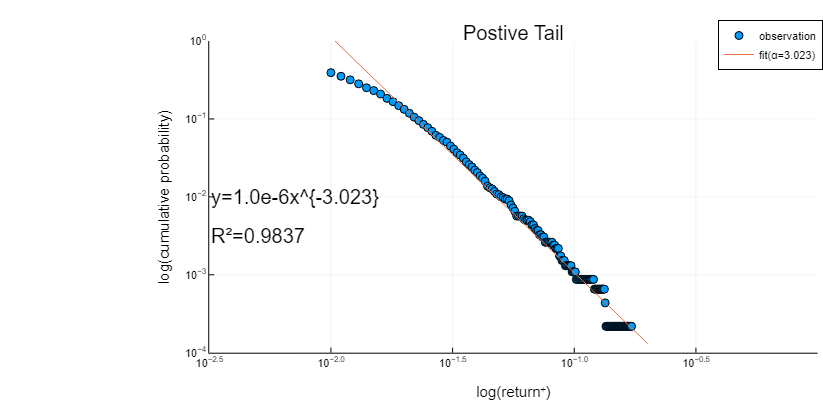

In [22]:
α,c,R²=power_law_fit(r⁺,xs)
plotly()
scatter(xs,ecdf(r⁺).(xs),label="observation")
plot!(x->(10^c)*(x^(-α)),xs,label="fit(α=$(round(α;digits=3)))")
xlabel!("log(return⁺)")
ylabel!("log(cumulative probability)")
title!("Postive Tail")
annotate!(-2.5,-2,text("y=$(round(10^c;digits=6))x^{-$(round(α;digits=3))}",:left))
annotate!(-2.5,-2.5,text("R²=$(round(R²;digits=4))",:left))
xaxis!(:log)
yaxis!(:log)
ylims!(10^-4,10^0)
xlims!(10^-2.5,10^0)

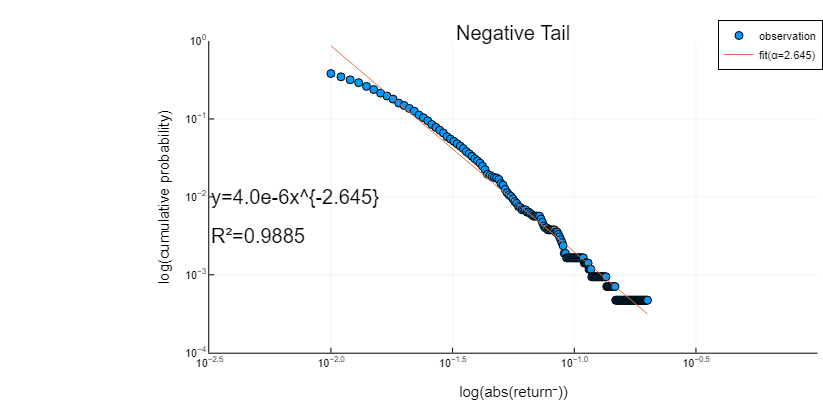

In [23]:
absr⁻=abs.(r⁻)
α,c,R²=power_law_fit(absr⁻,xs)
plotly()
scatter(xs,ecdf(absr⁻).(xs),label="observation")
plot!(x->(10^c)*(x^(-α)),xs,label="fit(α=$(round(α;digits=3)))")
xlabel!("log(abs(return⁻))")
ylabel!("log(cumulative probability)")
title!("Negative Tail")
annotate!(-2.5,-2,text("y=$(round(10^c;digits=6))x^{-$(round(α;digits=3))}",:left))
annotate!(-2.5,-2.5,text("R²=$(round(R²;digits=4))",:left))
xaxis!(:log)
yaxis!(:log)
ylims!(10^-4,10^0)
xlims!(10^-2.5,10^0)

## f. Observe  whether  the  plots  obey  power  law  distributions.  If  so,  calculate  the  exponents  of  the power-law regime.

From the plots, we can claim that both positive and negative tail obey power law distributions.

The $\alpha_+=3.023$ is the exponents of positive tail and $\alpha_-=2.645$ is the exponents of negative tail.